<a href="https://colab.research.google.com/github/dwaipayan05/CovCNN-WebApp/blob/main/COVID_Chest_X_Ray_(VGG16).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Necessary Libraries**

In [3]:
!pip install keras
!pip install tensorflow
!pip install tqdm


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ------------------------------------ 266.3/266.3 MB 613.7 kB/s eta 0:00:00
  Using cached grpcio-1.50.0-cp310-cp310-win_amd64.whl (3.6 MB)
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     ---------------------------------------- 6.0/6.0 MB 906.9 kB/s eta 0:00:00
  Using cached h5py-3.7.0-cp310-cp310-win_amd64.whl (2.6 MB)
  Using cached wrapt-1.14.1-cp310-cp310-win_amd64.whl (35 kB)
  Using cached typing_extensions-4.4.0-py3-none-any.whl (26 kB)
  Using cached libclang-14.0.6-py2.py3-none-win_amd64.whl (14.2 MB)
     ------------------------------------ 439.2/439.2 kB 638.4 kB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 443.5 kB/s eta 0:00:00
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
  Using cached protobuf-3.19.6-cp310-cp310-win_amd64.whl (895 kB)
  Using cached absl_py-1.3.0-py3-none-any.whl (124 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
  Using cac

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\p


[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [6]:
!pip install opencv-python
!pip install scikit-learn

  Using cached opencv_python-4.6.0.66-cp36-abi3-win_amd64.whl (35.6 MB)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip

[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


     ---------------------------------------- 7.5/7.5 MB 335.8 kB/s eta 0:00:00
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
     -------------------------------------- 40.1/40.1 MB 688.5 kB/s eta 0:00:00
  Using cached scikit_learn-1.1.3-cp310-cp310-win_amd64.whl (7.5 MB)
  Using cached threadpoolctl-3.1.0-py3-none-any.whl (14 kB)
     ---------------------------------------- 40.1/40.1 MB 1.1 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)



[notice] A new release of pip available: 22.2.2 -> 22.3.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [7]:
import os
import pandas as pd
import numpy as np
from tqdm import tqdm
import keras
from keras.utils.np_utils import to_categorical
import cv2
import tensorflow as tf
from sklearn.model_selection import train_test_split
from keras.layers import  Flatten, Dense, Dropout
from keras.models import Sequential
from keras.models import Model
from keras import optimizers
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator
from keras import callbacks
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'keras_preprocessing'

**Split Into Train Data & Test Data**

In [8]:
disease_types=['COVID', 'non-COVID']
data_dir = '../cov_data'
train_dir = os.path.join(data_dir)

In [9]:
img_height,img_width=180,180
batch_size=32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2481 files belonging to 2 classes.
Using 1985 files for training.
Found 2481 files belonging to 2 classes.
Using 496 files for validation.


**Define Model Architecture**

In [ ]:
resnet_model = Sequential()

pretrained_model= tf.keras.applications.ResNet50(include_top=False,
                   input_shape=(180,180,3),
                   pooling='max',classes=2,
                   weights='imagenet')
for layer in pretrained_model.layers:
        layer.trainable=False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(64))
resnet_model.add(Activation('relu'))
resnet_model.add(Dropout(0.5))
resnet_model.add(Dense(1))
resnet_model.add(Activation('sigmoid'))
resnet_model.summary()

resnet_model.compile(optimizer=Adam(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
resnet_model._name = "ResNet50_Architecture"
resnet_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
 activation_1 (Activation)   (None, 1)                

/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


**Train the Model**

In [ ]:
history = resnet_model.fit(train_ds, epochs=30,
                              validation_data=val_ds)

Epoch 1/30
63/63 [==============================] - 13s 170ms/step - loss: 0.4017 - accuracy: 0.8670 - val_loss: 0.3826 - val_accuracy: 0.8891
Epoch 2/30
63/63 [==============================] - 12s 170ms/step - loss: 0.4377 - accuracy: 0.8408 - val_loss: 0.3654 - val_accuracy: 0.9093
Epoch 3/30
63/63 [==============================] - 11s 167ms/step - loss: 0.4588 - accuracy: 0.8050 - val_loss: 0.4141 - val_accuracy: 0.8387
Epoch 4/30
63/63 [==============================] - 12s 170ms/step - loss: 0.4252 - accuracy: 0.8322 - val_loss: 0.4103 - val_accuracy: 0.8508
Epoch 5/30
63/63 [==============================] - 12s 169ms/step - loss: 0.4261 - accuracy: 0.8207 - val_loss: 0.3807 - val_accuracy: 0.8649
Epoch 6/30
63/63 [==============================] - 12s 168ms/step - loss: 0.4278 - accuracy: 0.8207 - val_loss: 0.3713 - val_accuracy: 0.8569
Epoch 7/30
63/63 [==============================] - 12s 173ms/step - loss: 0.3580 - accuracy: 0.8826 - val_loss: 0.4200 - val_accuracy: 0.8327

**Plot the Results**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

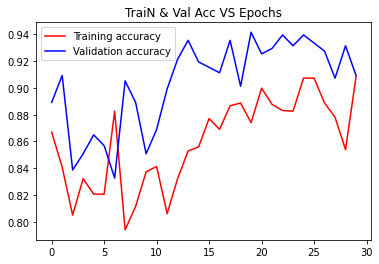

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('TraiN & Val Acc VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

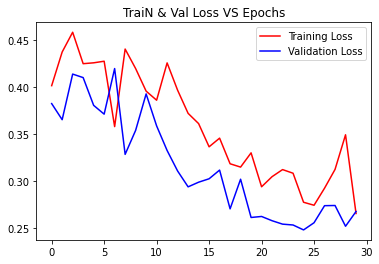

<Figure size 432x288 with 0 Axes>

In [ ]:
epochs = range(len(acc))
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('TraiN & Val Loss VS Epochs')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:

score = resnet_model.evaluate(val_ds,verbose=1)
print('Test Loss:', score[0])
print('Test accuracy:', score[1]*100)

16/16 [==============================] - 3s 104ms/step - loss: 0.2673 - accuracy: 0.9093
Test Loss: 0.2673288881778717
Test accuracy: 90.92742204666138
